<span style="font-size: 18px; font-weight: bold">PASTICIER Benjamin</span><br>
<span style="font-size: 18px; font-weight: bold">WEIZMANN Allan</span><br>
<br><br>

<center><span style="font-size: 40px; font-weight: bold">LU3PY121 - Electromagnétisme et Optique</span></center><br>
<center><span style="font-size: 35px; font-weight: bold">TP6 - Biréfringence</span></center>
<br><br><br><br>

<span style="font-size: 30px; font-weight: bold">Introduction</span> <a class="anchor" id="Sec1"></a>

La biréfringence  ($\Delta n$) est une propriété optique des cristaux anisotropes : lorsqu'une onde se propage dans le cristal, l'indice optique ressenti par le champ électrique dépend de sa polarisation. On s'intéresse ici aux milieux biréfringents uniaxes, possédant une symétrie axiale selon leur axe optique.  Un champ électrique polarisé selon cet axe verra un
indice optique $n_e$ appelé indice extraordinaire, alors que toute polarisation dans le plan perpendiculaire verra un indice $n_o$ appelé indice ordinaire (et $\Delta n = n_e - n_o$).

De plus, on appelle lame biréfringente parallèle une lame taillée de manière à ce que les axes d'entrée et de sortie soient taillés parallèlement à l'axe optique. Dans cette situation, une onde polarisée rectilignement entrant dans la lame en incidence normale, il existe deux axes de polarisation dits axes neutres pour lesquels la polarisation de sortie est inchangée. Une onde dont la polarisation rectiligne est selon un des axes neutres se propage alors comme dans un milieu d'indice $n_e$ ou $n_o$.

Lors de ce TP, nous allons étendre l'étude de la biréfringence commencée au TP2 à plusieurs matériaux. Nous étudierons la biréfringence d'un barreau de plexiglas sur une lumière polarisée (laser vert), puis celle d'une lame de quartz sur une lumière à large spectre. Nous déterminerons la biréfringence de ces matériaux en utilisant des polariseurs, des analyseurs et un écran.

In [3]:
import numpy as np
import qexpy as q
import qexpy.plotting as qplt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

<br><br><br>
<span style="font-size: 30px; font-weight: bold">Biréfringence d'un barreau de plexiglas</span> <a class="anchor" id="Sec2"></a>

<br>

<span style="font-size: 20px; font-weight: bold">Principe de la manipulation :</span> <a class="anchor" id="Sec2"></a>

On s'intéresse en premier lieu à l'étude du comportement de faisceaux lumineux lors du passage par un barreau de plexiglas. Ce matériau forme une lame biréfringente très épaisse (40 cm). Les propriétés de diffusion du plexiglas nous permettent d'étudier la polarisation de la lumière à différents endroits du barreau, ce qui équivaut à faire varier l'épaisseur $e$ de notre lame biréfringente. Grâce à cet effet, nous allons pouvoir mesurer la biréfringence $\Delta n = n_e - n_o$ du plexigas via la formule du déphasage entre les composantes du champ en sortie du barreau :

$$\Delta \varphi = 2\pi \frac{e \Delta n}{\lambda}$$



Pour cette manipulation, on utilise : 
- Un polariseur
- Un laser vert de longueur d'onde $\lambda = 532nm$
- Un barreau de plexiglas de diamètre 1cm et de longueur 40cm
- Un analyseur 
- Un écran


On aligne le Laser avec le barreau de sorte que le rayon traverse toute la longueur de plexiglas. On place un polariseur en amont du barreau et dont la direction passante fait un angle de $45°$ avec la verticale à l'entrée du barreau. On place pour finir un analyseur en configuration croisée avec le polariseur en sortie du barreau, et un écran en sortie du système. 

<br>

<span style="font-size: 20px; font-weight: bold">Observations :</span> <a class="anchor" id="Sec2"></a>

Lorsque l'on tourne le barreau de plexiglas, on trouve quatre angles pour lesquelles l'intensité de sortie est quasi-nulle. Le polariseur et l'analyseur étant en position croisée, l'intensité de sortie mesurée sur l'écran doit être minimale (voir nulle) lorsque la polarisation de l'onde n'est pas modifiée par le barreau de plexiglas. Les quatre angles définissent donc les deux lignes neutres du barreau de plexiglas. Lorsque la lumière polarisée est selon une ligne neutre, on observe le laser à l'intérieur du plexiglas. On remarque que lorsqu'on regarde le barreau de plexigas sous certains angles (égaux à l'angle de polarisation initial + pi/2), on ne voit plus le laser à l'intérieur du barreau..

Si maintenant on tourne le polariseur à 0° (la lumière est donc polarisée rectilignement avec un angle de 45° par rapport à la ligne neutre du barreau de plexiglas), on observe une alternance de forte intensité et de faible intensité lumineuse du laser à l'intérieur du barreau de plexiglas avec des intervalles réguliers. De plus, lorsqu'on observe le barreau par dessus, on remarque que les portions de forte intensité et de faible intensité du laser s'inversent par rapport aux observations faites par le côté du barreau.

<br>

<span style="font-size: 20px; font-weight: bold">Interprétations :</span> <a class="anchor" id="Sec2"></a>

Le laser est visible dans le barreau grâce à la diffusion de Rayleigh : le laser excite les composants du matériau, qui deviennent des dipôles oscillants et émettent à leur tour une lumière, celle qu'on observe. Cette diffusion se fait perpendiculairement au dipôle. La polarisation du laser à l'intérieur du barreau de plexiglas créé des dipôles selon un certain angle, qui vont eux aussi émettre de la lumière selon un certain angle. La taille des "franges" d'intensité qu'on observe après avoir tourné le polariseur à 0° nous permet donc de déterminer la polarisation à différents endroits du laser. En effet, entre deux pics d'intensité, la lumière aura un déphasage de $n2\pi$ (avec n un entier) : les dipôles créés par diffusion de Rayleigh auront "tourné" pour revenir perpendiculaires à la direction d'observation. 

Le laser vert possède une longueur d'onde plus faible que le laser rouge et a donc une énergie plus grande. On aura donc plus de facilité à voir le laser par diffusion de Rayleigh avec un laser vert qu'avec un laser rouge, et on pourra ainsi déterminer avec plus de précision les épaisseurs pour lesquelles on a un pic d'intensité.

On a également: $\Delta \varphi = 2\pi \frac{e \Delta n}{\lambda}$

Et on sait qu'on peut déterminer dans le barreau les épaisseurs $e$ pour lesquels le déphasage est égal à $n\pi$ , donc on va pouvoir tracer la fonction :
$\frac{\Delta \varphi \lambda}{2\pi}$ en fonction de $e$

Et d'après $\Delta \varphi = 2\pi \frac{e \Delta n}{\lambda}$ , on a $\frac{\Delta \varphi \lambda}{2\pi} = e\Delta n$

On devrait donc retrouver une fonction affine avec pour coefficient directeur $\Delta n$ la biréfringence de notre lame de plexiglas.

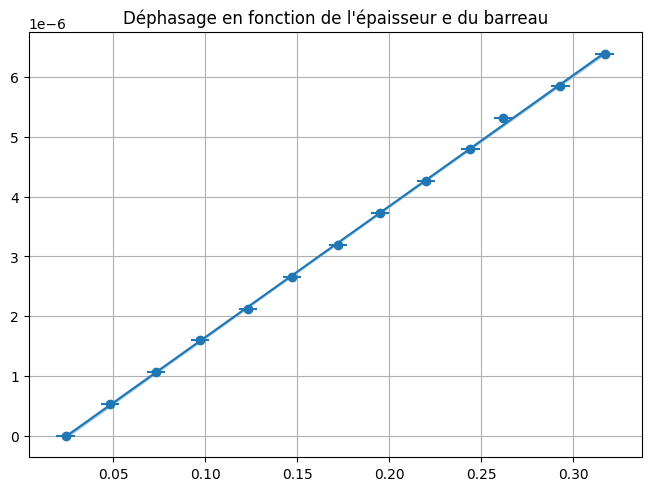

----------------- Fit Results -------------------
Fit of XY Dataset to linear

Result Parameter List: 
slope = 0.0000219 +/- 0.0000001,
intercept = -0.00000054 +/- 0.00000002

Correlation Matrix: 
[[ 1.    -0.882]
 [-0.882  1.   ]]

chi2/ndof = 0.00/10

--------------- End Fit Results -----------------


In [9]:
# Données et conversion en array qexpy
phy1 = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12])*532*10**(-9) #déphasage
e = np.array([2.4,4.8,7.3,9.7,12.3,14.7,17.2,19.5,22.0,24.4,26.2,29.3,31.7])/100  #mètre
phyq = phy1
eq = q.MeasurementArray(e,error=5*10**(-3))

# Figure et fit par qexpy
fig = qplt.plot(eq,phyq)
figure = qplt.get_plot()
figure.title = "Déphasage en fonction de l'épaisseur e du barreau" 
result = fig.fit(model=q.FitModel.LINEAR, parguess = [2, 0])

# Affichage du graphe et du fit
figure.show()
print(result)

On observe bien une courbe linéaire, dont la pente nous donne la valeur de la biréfringence.
On trouve alors une valeur de biréfringence pour le plexiglas : $\Delta n = 2,19.10^{-5} \pm{1.10^{-7}}$

Cette valeur est bien de l'ordre donné dans le polycopié de TP ($\Delta n \sim 3.10^{-5}$). On a pu trouver une valeur cohérente pour la biréfringence du plexiglas à partir de nos mesures.

<br><br><br>

<span style="font-size: 30px; font-weight: bold">Spectre cannelé</span> <a class="anchor" id="Sec3"></a>

<br>

<span style="font-size: 20px; font-weight: bold">Principe de la manipulation :</span> <a class="anchor" id="Sec2"></a>

Dans la première partie, nous vérifié la modification de l'état de polarisation de la lumière ayant traversé une certaine épaisseur d'une lame biréfringente et déterminé la biréfringence du plexiglas. On s'intéresse désormais à la modification du déphasage en fonction de la longueur d'onde de la lumière incidente.

Pour cela, on utilise :
- Une lampe blanche (à spectre large)
- Un polariseur
- Un analyseur
- Une lame de quartz
- Un spectromètre relié à un ordinateur

On place dans l'ordre sur le banc optique : la lampe à spectre large, le polariseur, la lame de quartz, l'analyseur, puis le spectromètre qu'on relie à un ordinateur.

On aura alors dans ce cas l'intensité lumineuse captée par le spectromètre selon $\theta$ l'angle entre le polariseur et une ligne neutre, et $\alpha$ l'angle entre entre le polariseur et l'analyseur, telle que : 
$$I(\alpha,\theta,\Delta\varphi) = I_0[cos^2(\alpha-\theta)cos^2(\theta) + sin^2(\alpha - \theta)sin^2(\theta) - \frac{1}{2}sin(2\alpha - 2\theta)sin(2\theta)cos(\Delta\varphi)]$$

De plus, pour les longueurs d'onde du visible avec une lame de quartz d'épaisseur 0.1 mm, on devrait se retrouver avec la courbe suivante de $\Delta \varphi$ :

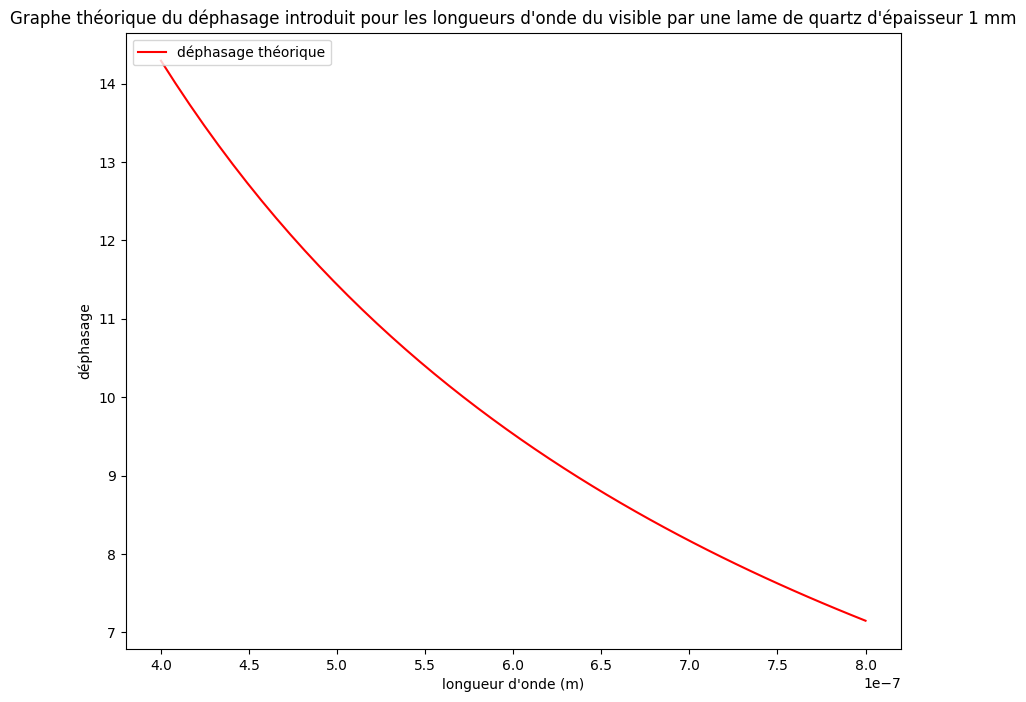

In [12]:
l = np.linspace(4,8,50)*10**(-7)
deltaphi = 2*np.pi*9.1*10**(-3)*10**(-4)/l

# Graphique
plt.figure(figsize=(10,8))
plt.plot(l, deltaphi, label="déphasage théorique", color='red')
plt.xlabel("longueur d'onde (m)")
plt.ylabel("déphasage")
plt.title("Graphe théorique du déphasage introduit pour les longueurs d'onde du visible par une lame de quartz d'épaisseur 0.1 mm")
plt.legend(loc=2)

Pour pouvoir observer le phénomène, on a besoin que le déphasage ne varie pas trop vite. On a donc besoin d'une lame avec une épaisseur de l'ordre du 10ème de millimètre.

Nous allons commencer par caractériser le système lorsque le polariseur et l'analyseur sont en position croisée.

<br>

<span style="font-size: 20px; font-weight: bold">Observations avec le polariseur et l'analyseur en position croisée :</span> <a class="anchor" id="Sec2"></a>

Lorsqu'on fait tourner la lame de quartz dans cette configuration, on remarque que l'intensité mesurée par le spectromètre varie. On a 4 angles pour lesquels l'intensité est maximale, et 4 angles pour lesquels on a quasiment une extinction pour toutes les longueurs d'onde. Les maxima d'intensité correspondent aux angles pour lesquels les lignes neutres de la lame de quartz sont à 45°  de l'axe de polarisation induit par le polariseur, tandis que les minima correspondent aux angles pour lesquels les lignes neutres de la lame sont à 0° de l'axe de polarisation.

De plus, toujours en faisant tourner la lame, les longueurs d'onde où apparaissent les cannelures ne varient pas, et les cannelures ne disparaissent pas peu importe l'angle de rotation.
L'intensité des cannelures étant toujours 0, le contraste entre cannelures et maxima ne varie pas et vaut toujours 1.

<br>

<span style="font-size: 20px; font-weight: bold">Interprétations :</span> <a class="anchor" id="Sec2"></a>

Dans le cas que l'on étudie, on à $\alpha = \frac{\pi}{2}$ et $\theta$ variable. La formule de l'intensité qu'on a donné précédemment se simplifie :
$$I(\theta, \Delta\varphi) = I_0sin^2(2\theta)sin^2(\frac{\Delta\varphi}{2})$$

Lorsque $\theta = 0$, donc que l'axe neutre de la lame est confondu avec l'axe de polarisation de l'onde incidente, l'expression précédente nous donne $I(0, \Delta\varphi) = 0$. On doit donc avoir une intensité nulle pour toutes les longueurs d'onde dans ce cas. C'est bien ce qu'on a trouvé expérimentalement dans la partie "Observations". 

De plus, la polarisation en sortie de lame dépend de $\lambda$, car on observe les canelures à certaines valeurs précise de $\lambda$ qui sont de plus en plus éloignées lorsque $\lambda$ augmente (comme prévu par le graphe de $\Delta \varphi$ en fonction de $\lambda$).

On peut également montrer que le contraste est constant et égal à 1 puisque $I_{min} = 0$ d'après la formule précédente. On a alors : $C = \frac{I_{max}-I_{min}}{I_{max}+I_{min}} = \frac{I_{max}}{I_{max}} = 1$ si $I_{max} \neq 0$

<br>

<span style="font-size: 20px; font-weight: bold">Mesure de la biréfringence du quartz :</span> <a class="anchor" id="Sec2"></a>

En se plaçant en configuration croisée avec la lame biréfringente à 45° ($\alpha = \frac{\pi}{2}$ et $\alpha = \frac{\pi}{4}$), la formule précédente se simplifie encore puisque $sin^2(\frac{\pi}{2}) = 1$. On a :
$$I(\theta, \Delta\varphi) = I_0sin^2(\frac{\Delta\varphi}{2})$$

On en déduit que pour avoir des cannelures, il faut que $sin^2(\frac{\Delta\varphi}{2}) = 0$ et donc que $\Delta\varphi = 2k\pi$, avec k un entier.

On a alors $k = \frac{e\Delta n }{\lambda}$. En traçant la courbe de k en fonction de 1/$\lambda$, on devrait donc obtenir une courbe linéaire de coefficient directeur $e\Delta n$ et ainsi déterminer la biréfringence du quartz.


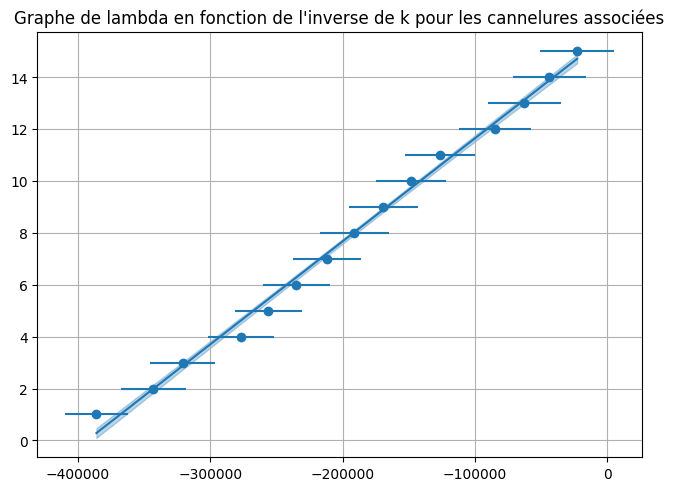

----------------- Fit Results -------------------
Fit of XY Dataset to linear

Result Parameter List: 
slope = 0.0000397 +/- 0.0000008,
intercept = 15.6 +/- 0.2

Correlation Matrix: 
[[1.   0.87]
 [0.87 1.  ]]

chi2/ndof = 0.00/12

--------------- End Fit Results -----------------


In [35]:
# Données et conversion en array qexpy
l0 = 499.6*10**(-9)
lam = np.flip(np.array([505.3,510.7,515.7,521.6,533.2,539.5,545.7,552.3,558.7,566.0,572.9,579.8,595.0,602.9,619.0])*10**(-9))  #lambda en m

lamq = q.MeasurementArray(lam, error=5*10**(-9))
l_0 = np.linspace(l0,l0,len(lam))
l_0q = q.MeasurementArray(l_0,error=5*10**(-9))

k=np.linspace(1,len(lam),len(lam))
l_q =(1/lamq)-(1/l_0q)

# Figure et fit par qexpy
fig2 = qplt.plot(l_q,k)
figure = qplt.get_plot()
figure.title = "Graphe de lambda en fonction de l'inverse de k pour les cannelures associées" 
result = fig2.fit(model=q.FitModel.LINEAR, parguess = [2, 0])

# Affichage du graphe et du fit
figure.show()
print(result)

On trouve un coefficient directeur de la droite égal à $3,97.10^{-5} \pm 8.10^{-7}$. Cela nous permet de retrouver une valeur de la biréfringence du quartz : 
$$\Delta n = 8,6.10^{-3} \pm 10^{-1}$$

On retrouve une biréfringence proche de la valeur théorique donnée dans le poly de TP ($9,1.10^{-3}$), mais qui n'est pas comprise dans notre barre d'erreur.

<br>

<span style="font-size: 20px; font-weight: bold">Observations avec la lame à pi/4 du polariseur :</span> <a class="anchor" id="Sec2"></a>

On fixe maintenant l'angle entre le polariseur et les lignes neutres de la lame de quartz : $\alpha = \frac{\pi}{4}$ et on fait bouger l'analyseur ($\alpha = variable$).

Lorsqu'on tourne l'analyseur, On observe une variation du contraste des cannelures. Contrairement au cas précédent, lorsqu'on a un angle $\alpha = \frac{\pi}{4}$ entre l'analyseur et la lame, le contraste est minimal : on ne voit plus les franges mais seulement un spectre. A l'inverse, pour $\alpha = 0$, le contraste est maximal est on voit parfaitement les cannelures.

De plus, lorsqu'on passe dans les angles négatifs, on remarque que la position des cannelures change.

<br>

<span style="font-size: 20px; font-weight: bold">Interprétation :</span> <a class="anchor" id="Sec2"></a>
Dans cette configuration, toutes les polarisation elliptiques sont possibles selon l'angle de l'analyseur.

La longue équation qu'on avait au début du TP se simplifie dans notre cas ($\theta = \frac{\pi}{4}$) :
$$ I(\alpha, \Delta\varphi) = \frac{I_0}{2}(1 + cos(2\alpha)cos(\Delta\varphi)) $$

Lorsque $\alpha = \pi / 4$, on a $I = \frac{I_0}{2}$ puisque $cos(2\alpha) = 0$. On a donc $I = cste$ et le contraste est bien nul, on a disparition des cannelures. A l'inverse, pour $\alpha = 0$, $cos(2\alpha) = 1$ donc $I(\alpha, \Delta\varphi) = \frac{I_0}{2}(1 + cos(\Delta\varphi))$ et on aura un contraste maximal.

En exprimant le contraste en fonction de $\alpha$, on remarque que celui-ci devient négatif lorsque $cos(2\alpha)$ devient négatif : les cannelures se décalent.

<br><br><br>

<span style="font-size: 30px; font-weight: bold">Conclusion</span> <a class="anchor" id="Sec5"></a>

Lors de ce TP, nous avons étudié la biréfringence de différents matériaux. Nous avons vu les effets de l'angle d'incidence sur la polarisation en sortie des différents systèmes optiques que nous avons considéré (barreau de plexiglas, lame de quartz). Nous avons également découvert des moyens expérimentaux pour mesurer la biréfringence d'un matériau. Enfin, nous avons étudié des spectres cannelés pour une lampe à large spectre passant par une lame de quartz en regardant le contraste entre cannelures et maximum d'intensité pour différentes configurations de polariseur et d'analyseur.